# Q2

In [5]:
import cv2 # just for reading the image
import numpy as np
import matplotlib.pyplot as plt

# read image "q2.png"

In [9]:
img = "/content/q2.png"

# plot the image

In [10]:
img = cv2.imread(img)

# Convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

array([[[240, 230, 238],
        [229, 238, 233],
        [243, 237, 241],
        ...,
        [244, 235, 238],
        [233, 233, 225],
        [231, 230, 225]],

       [[244, 235, 238],
        [245, 246, 248],
        [246, 240, 244],
        ...,
        [245, 240, 244],
        [247, 240, 247],
        [244, 243, 241]],

       [[246, 235, 243],
        [240, 242, 241],
        [248, 242, 242],
        ...,
        [243, 237, 237],
        [240, 235, 239],
        [238, 237, 235]],

       ...,

       [[231, 226, 233],
        [228, 222, 232],
        [230, 224, 234],
        ...,
        [244, 234, 242],
        [240, 234, 238],
        [240, 235, 239]],

       [[227, 226, 232],
        [225, 222, 229],
        [226, 223, 232],
        ...,
        [240, 233, 240],
        [240, 233, 240],
        [242, 237, 243]],

       [[227, 224, 231],
        [224, 221, 228],
        [227, 224, 233],
        ...,
        [242, 235, 242],
        [241, 236, 242],
        [240, 238, 243]]], dtype=uint8)
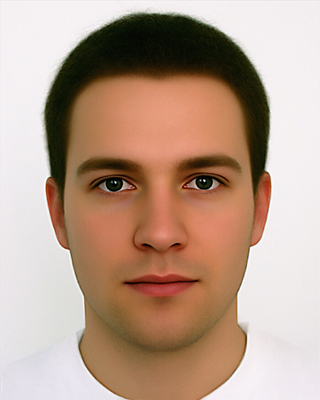

In [11]:
img

# Implement the needed functions

In [12]:
def get_adjacents(point, grid_size, connectivity_type):
    # Initialize the list to store adjacent points
    adjacents = []

    # Unpack the point coordinates
    x, y = point

    # Define the possible directions for movement based on connectivity type
    if connectivity_type == 0:  # 4-connectivity
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    elif connectivity_type == 1:  # 8-connectivity
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    else:
        raise ValueError("Invalid connectivity type. Use 0 for 4-connectivity or 1 for 8-connectivity.")

    # Iterate through each direction to compute adjacent points
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        # Check if the new coordinates are within grid boundaries
        if 0 <= nx < grid_size[0] and 0 <= ny < grid_size[1]:
            adjacents.append((nx, ny))

    return adjacents

In [14]:
def segment(image,seed_point,threshold,neighbor_mode=0):
    segmented_image = image.copy()
    ### neighbor_mode=0 => 4-connectivity
    ### neighbor_mode=1 => 8-connectivity
    ### your implementation
    ###
    # Initialize a boolean array to track visited pixels
    visited = np.zeros(image.shape[:2], dtype=bool)

    # Initialize the list of points to visit with the seed point
    to_visit = [seed_point]

    # Get the color of the seed point
    initial_color = image[seed_point[0], seed_point[1]]

    while to_visit:
        # Pop the first point from the list of points to visit
        x, y = to_visit.pop(0)

        # Skip this point if it has already been visited
        if visited[x, y]:
            continue

        # Get the color of the current point
        current_color = image[x, y]

        # Check if the color difference is within the threshold
        if np.linalg.norm(initial_color - current_color) <= threshold:
            # Mark the pixel as part of the segmented region by coloring it red
            segmented_image[x, y] = [0, 0, 255]  # Blue color for segmentation

            # Mark the pixel as visited
            visited[x, y] = True

            # Get the adjacent points based on the connectivity type
            neighbors = get_adjacents((x, y), image.shape[:2], neighbor_mode)

            # Add the neighboring points to the list of points to visit
            to_visit.extend(neighbors)

    return segmented_image

In [32]:
seed_point = (110, 170)

# Define a range of thresholds to test
thresholds = [80, 90, 100, 120]

# plot the results and compare them

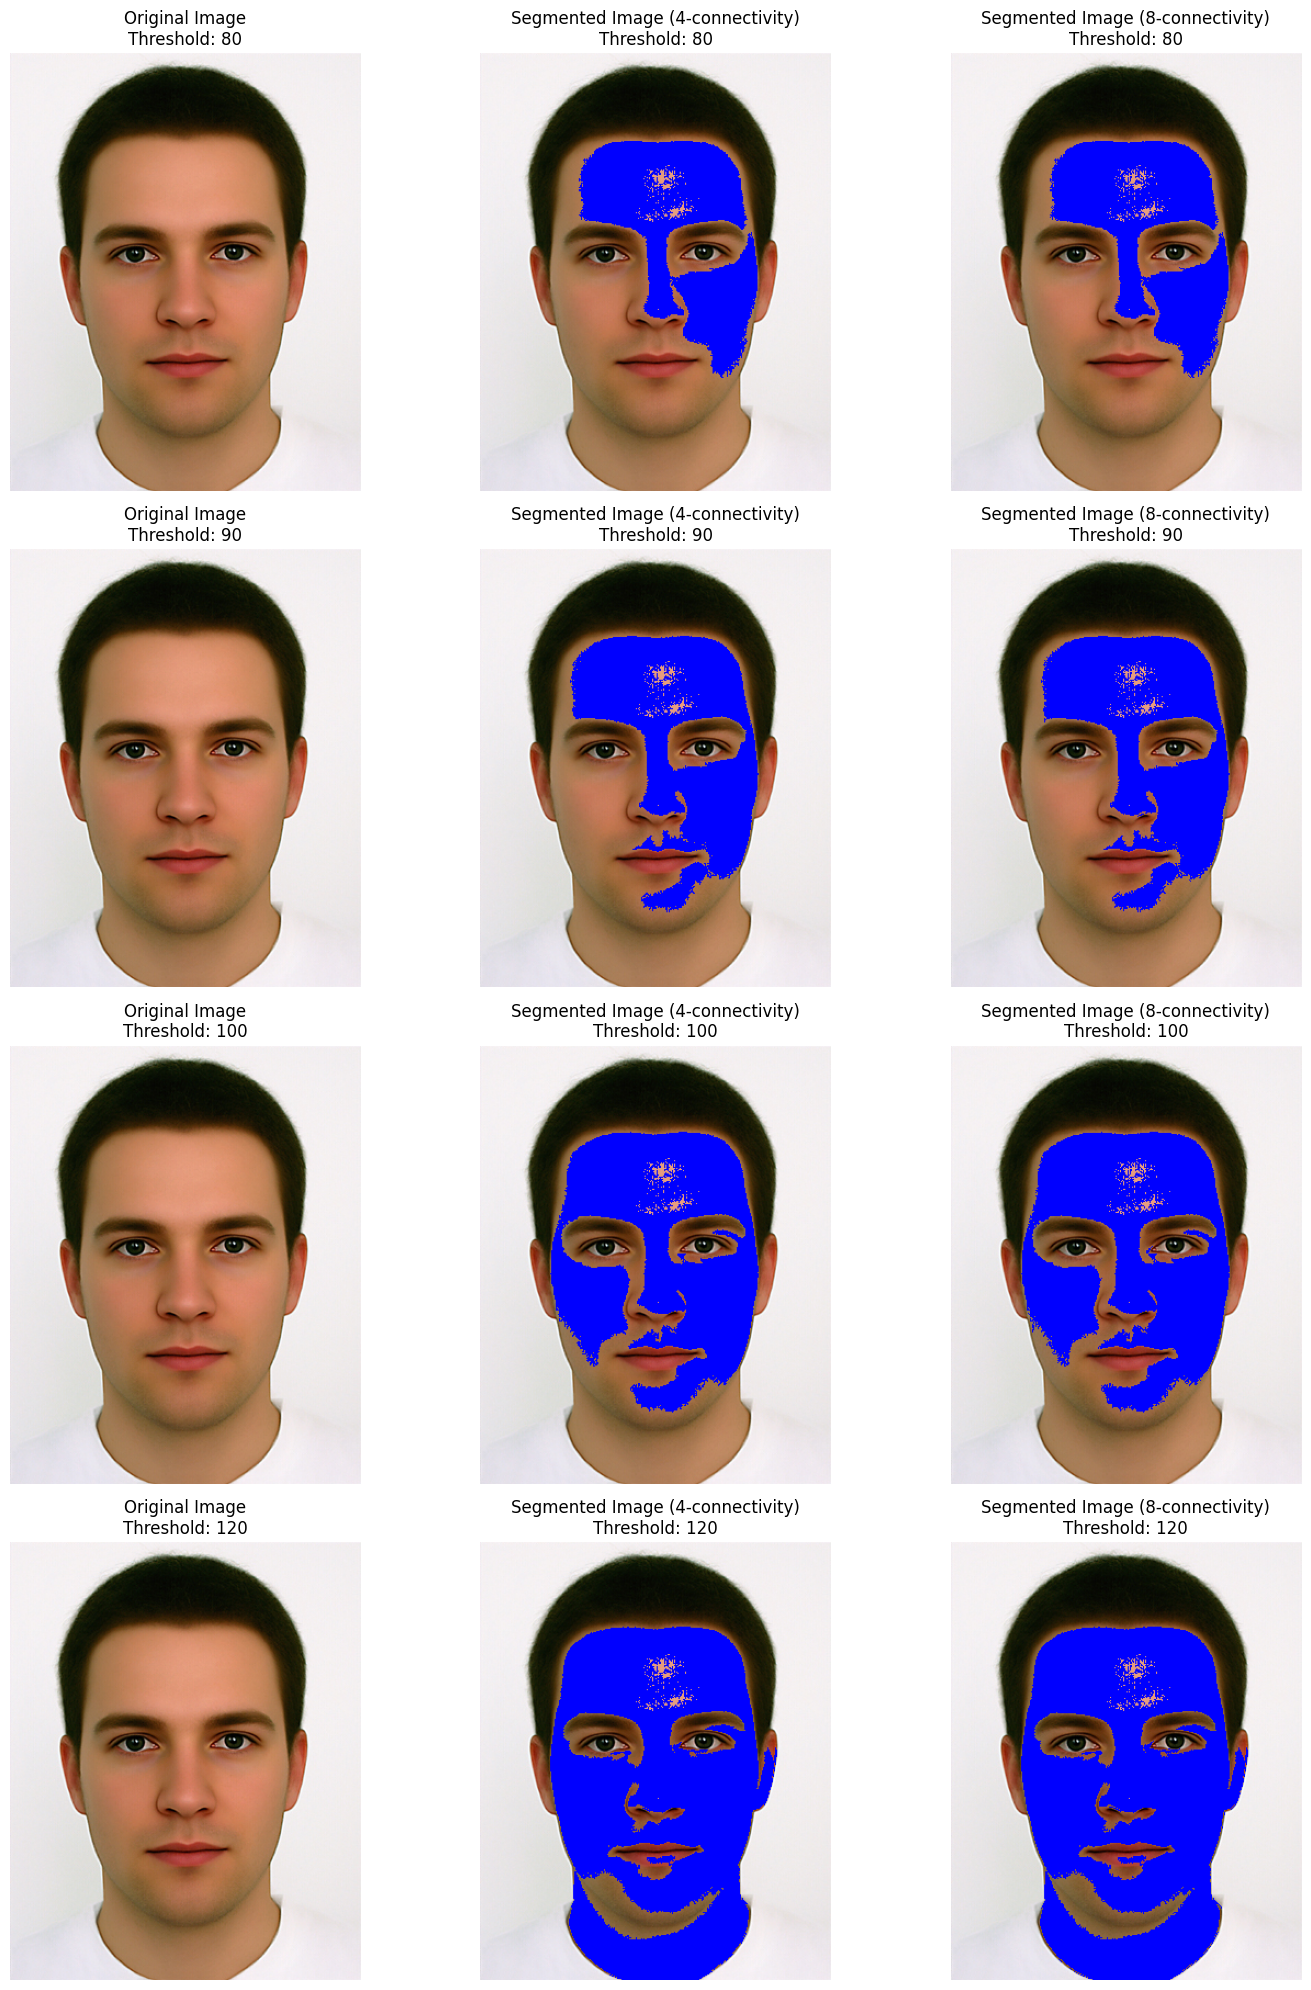

In [33]:
# Plotting the results for different thresholds
fig, axes = plt.subplots(len(thresholds), 3, figsize=(15, len(thresholds) * 5))
for i, threshold in enumerate(thresholds):
    segmented_image_4 = segment(img, seed_point, threshold)
    segmented_image_8 = segment(img, seed_point, threshold, 1)

    axes[i, 0].imshow(img)
    axes[i, 0].set_title(f"Original Image\nThreshold: {threshold}")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(segmented_image_4)
    axes[i, 1].set_title(f"Segmented Image (4-connectivity)\nThreshold: {threshold}")
    axes[i, 1].axis('off')

    axes[i, 2].imshow(segmented_image_8)
    axes[i, 2].set_title(f"Segmented Image (8-connectivity)\nThreshold: {threshold}")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()